# import packages

allantool is time and frequency tool for synchronization

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy.fft as fft
import allantools
from allantools import noise
import pandas as pd
import numpy as np

In [3]:
print('matplotlib version:',matplotlib.__version__)
print('numpy version:', np.__version__)
print('allantools version:', allantools.__version__)
print('pandas version:', pd.__version__)

matplotlib version: 3.2.1
numpy version: 1.19.1
allantools version: 2018.03
pandas version: 0.25.3


In [4]:
plt.rcParams['savefig.dpi'] = 80 #pixel
plt.rcParams['figure.dpi'] = 80 #resolution

# anchor data input

In [5]:
'''
12000s 50Hz TIE
'''
tmp = pd.read_csv('50Hz-loop-syncE.csv', header=None)
TIE = np.array(tmp[0])
tie = TIE[0:600000]
N = len(tie)

# shown in time domain

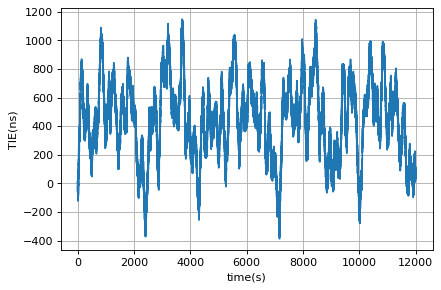

In [6]:
t = np.linspace(0, 12000, N)
plt.plot(t, tie)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('TIE(ns)')
deltaT = t[2] - t[1]
sample_rate = 1/deltaT  # sample rate
plt.show()

# TDEV analysis

/usr/local/lib/python3.6/dist-packages/allantools/allantools.py:233: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(s)


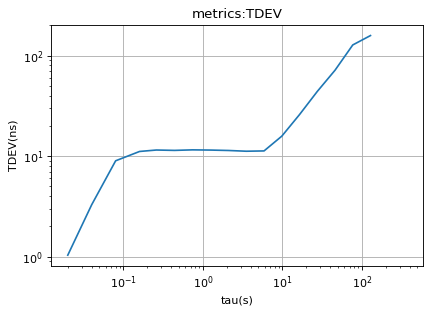

In [7]:
min_tau = np.log(1/sample_rate)
N_tdev = 32 # TDEV sample point
tau = np.logspace(min_tau, 3, N_tdev)  # min_tau->1000
(t, ad, ade, adn) = allantools.tdev(tie, rate=sample_rate,
                                    data_type="phase", taus=tau)  # Compute TDEV metrics
plt.loglog(t, ad,)  # Plot the results
plt.xlabel('tau(s)')
plt.ylabel('TDEV(ns)')
plt.grid()
plt.title('metrics:TDEV')
plt.show()

# PSD analysis
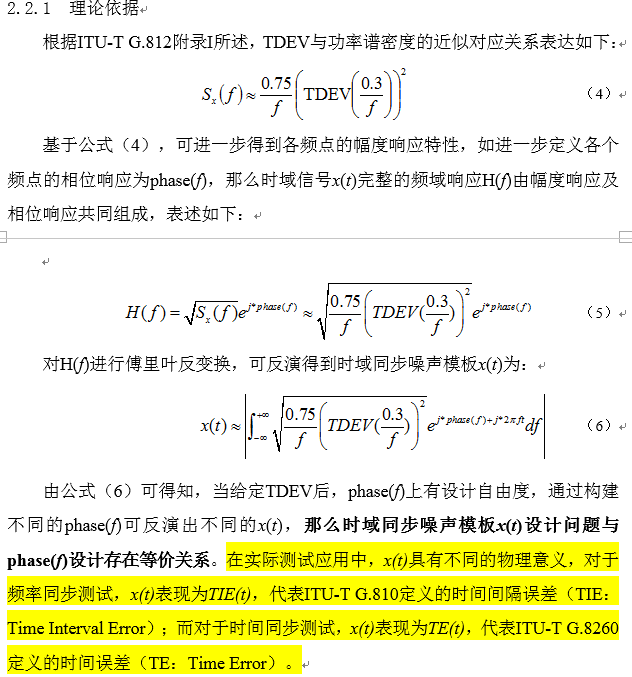

## welch method

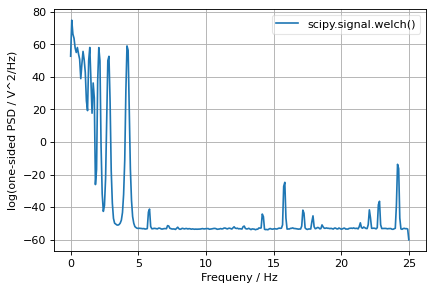

number of sample points: 301


In [8]:
fxx, Pxx_den = noise.scipy_psd(tie, sample_rate, nr_segments=1000)
Pxx_den_log = 10 * np.log(Pxx_den)
plt.figure()
# plt.semilogy(f,psd,label='numpy.fft()')
# plt.semilogy(fxx,Pxx_den_log,label='scipy.signal.welch()')
plt.plot(fxx, Pxx_den_log, label='scipy.signal.welch()')
#plt.semilogy(f,[b0]*len(f),label='b_0 = %.3g' % b0 )
plt.legend(framealpha=0.5)
plt.xlabel('Frequeny / Hz')
plt.ylabel('log(one-sided PSD / V^2/Hz)')
plt.grid()
plt.show()
print('number of sample points:', len(Pxx_den))

## numpy_psd method

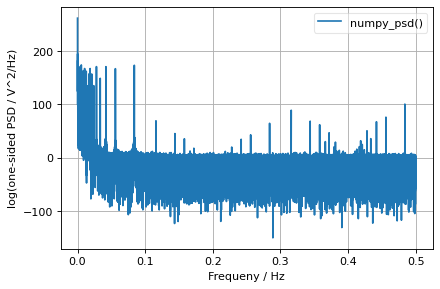

number of sample points: 300001


In [9]:
fxx, Pxx_den1 = noise.numpy_psd(tie, f_sample= 1.0)
Pxx_den1_log = 10 * np.log(Pxx_den1)
plt.figure()
# plt.semilogy(f,psd,label='numpy.fft()')
# plt.semilogy(fxx,Pxx_den_log,label='scipy.signal.welch()')
plt.plot(fxx, Pxx_den1_log, label='numpy_psd()')
#plt.semilogy(f,[b0]*len(f),label='b_0 = %.3g' % b0 )
plt.legend(framealpha=0.5)
plt.xlabel('Frequeny / Hz')
plt.ylabel('log(one-sided PSD / V^2/Hz)')
plt.grid()
plt.show()
print('number of sample points:', len(Pxx_den1))

## scipy FFT method

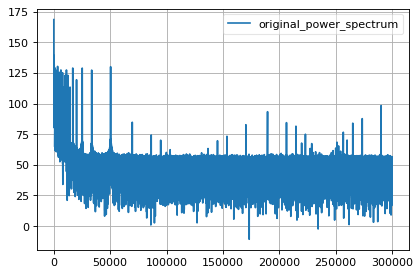

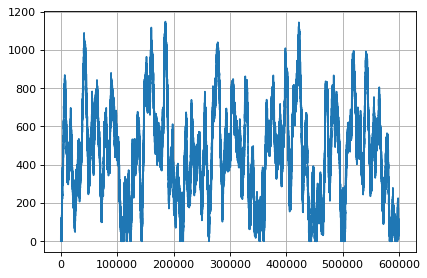

In [10]:
# from scipy.fftpack import fft, fftshift, ifft as sci_fft, sci_ifft
from scipy.fftpack import fft, ifft
from scipy.fftpack import fftfreq
num_fft = N
YY = fft(tie, num_fft)
Y = np.abs(YY)
# power spectrum
ps = Y**2 / num_fft

# print('Y:',Y)
# print('num_fft:',num_fft)

Pxx_den = ps
plt.plot(20*np.log10(Y[:num_fft//2]), label='original_power_spectrum')
plt.legend(framealpha=0.5)
plt.grid()
plt.show()
len(Y)
X = ifft(YY, num_fft)
plt.plot(abs(X),label='rebuild_x(t)')
plt.grid()
plt.show()

# conversion to time domain
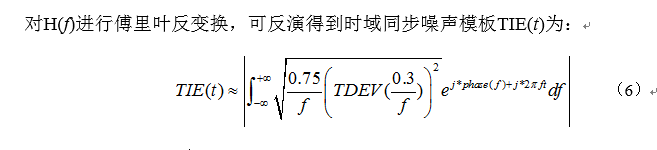

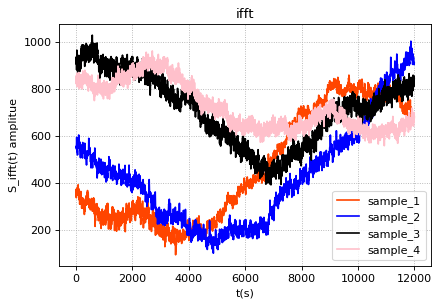

In [12]:
'''
select and generate 4 samples at random
'''
# Pxx_den = Y
Am_factor = 4.2e3
Am_factor = 1e3
Am = np.sqrt(Pxx_den)
phase = np.zeros((len(Pxx_den)), dtype=np.complex)
phase.real = np.random.randn((len(Pxx_den)))
phase.imag = np.random.randn((len(Pxx_den)))
norm_phase = phase / np.abs(phase)
complex_array1 = -Am * norm_phase
S_ifft1 = np.fft.ifft(complex_array1) * Am_factor

phase = np.zeros((len(Pxx_den)), dtype=np.complex)
phase.real = np.random.randn((len(Pxx_den)))
phase.imag = np.random.randn((len(Pxx_den)))
norm_phase = phase / np.abs(phase)
complex_array2 = Am * norm_phase
S_ifft2 = np.fft.ifft(complex_array2) * Am_factor

phase = np.zeros((len(Pxx_den)), dtype=np.complex)
phase.real = np.random.randn((len(Pxx_den)))
phase.imag = np.random.randn((len(Pxx_den)))
norm_phase = phase / np.abs(phase)
complex_array3 = Am * norm_phase
S_ifft3 = np.fft.ifft(complex_array3) * Am_factor

phase = np.zeros((len(Pxx_den)), dtype=np.complex)
phase.real = np.random.randn((len(Pxx_den)))
phase.imag = np.random.randn((len(Pxx_den)))
norm_phase = phase / np.abs(phase)
complex_array4 = Am * norm_phase
S_ifft4 = np.fft.ifft(complex_array4) * Am_factor

plt.plot(np.abs(S_ifft1)[:12000], label='S_ifft1', color='orangered')
plt.plot(np.abs(S_ifft2)[:12000], label='S_ifft2', color='blue')
plt.plot(np.abs(S_ifft3)[:12000], label='S_ifft3', color='black')
plt.plot(np.abs(S_ifft4)[:12000], label='S_ifft4', color='pink')
plt.xlabel("t(s)")
plt.ylabel("S_ifft(t) amplitue")
plt.title("ifft")
plt.grid(linestyle=':')
plt.legend(['sample_1', 'sample_2', 'sample_3', 'sample_4'])
plt.show()

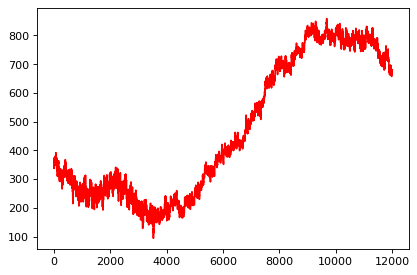

In [13]:
plt.plot(np.abs(S_ifft1)[:12000], label='S_ifft1', color='red')

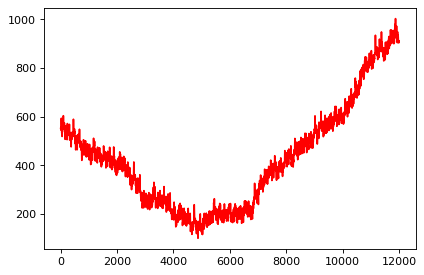

In [14]:
plt.plot(np.abs(S_ifft2)[:12000], label='S_ifft2', color='red')

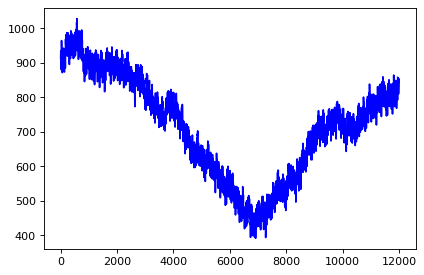

In [15]:
plt.plot(np.abs(S_ifft3)[:12000], label='S_ifft3', color='blue')

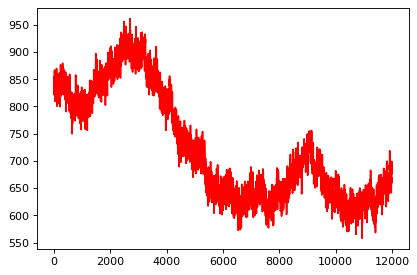

In [16]:
plt.plot(np.abs(S_ifft4)[:12000], label='S_ifft4', color='red')

# Compare to standard TDEV

/usr/local/lib/python3.6/dist-packages/allantools/allantools.py:233: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(s)


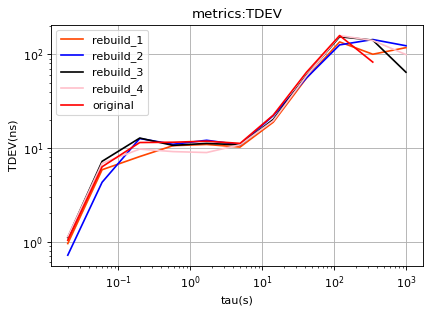

In [17]:
sample_rate1 = sample_rate
min_tau1 = np.log(1/sample_rate1)
N_tdev = 16
tau1 = np.logspace(min_tau1, 3, N_tdev)  # min_tau->1000
(t1, ad1, ade, adn) = allantools.tdev(np.abs(S_ifft1),
                                      rate=sample_rate1, data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad2, ade, adn) = allantools.tdev(np.abs(S_ifft2),
                                      rate=sample_rate1, data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad3, ade, adn) = allantools.tdev(np.abs(S_ifft3),
                                      rate=sample_rate1, data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad4, ade, adn) = allantools.tdev(np.abs(S_ifft4),
                                      rate=sample_rate1, data_type="phase", taus=tau1)  # Compute TDEV metrics
min_tau = np.log(1/sample_rate)
N_tdev = 16
tau = np.logspace(min_tau, 3, N_tdev)  # min_tau->1000
(t0, ad0, ade, adn) = allantools.tdev(tie, rate=sample_rate,
                                      data_type="phase", taus=tau)  # Compute TDEV metrics

plt.loglog(t1, ad1, 'orangered')  # Plot the results
plt.loglog(t1, ad2, 'blue')  # Plot the results
plt.loglog(t1, ad3, 'black')  # Plot the results
plt.loglog(t1, ad4, 'pink')  # Plot the results
plt.loglog(t0, ad0, 'red')  # Plot the results

plt.xlabel('tau(s)')
plt.ylabel('TDEV(ns)')
plt.grid()
plt.title('metrics:TDEV')
plt.legend(['rebuild_1', 'rebuild_2', 'rebuild_3', 'rebuild_4', 'original'])
plt.show()

# user-define template
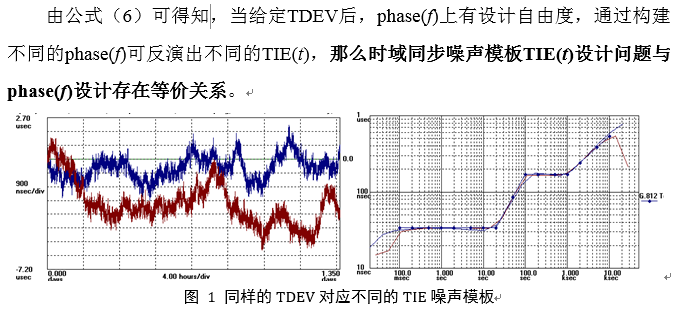

In [18]:
def phase_gen(phase_gen_num, style='gaussian_random'):
    phase = np.zeros(phase_gen_num, dtype=np.complex)
    phase_fun = np.ones((phase_gen_num))
    if style == 'constant':
        phase_fun = np.random.randn() * np.ones((phase_gen_num))
        phase.real = np.cos(phase_fun)
        phase.imag = np.sin(phase_fun)
    elif style == 'gaussian':
        phase_fun = np.random.randn((phase_gen_num))
        phase.real = np.cos(phase_fun)
        phase.imag = np.sin(phase_fun)
    elif style == 'laplace':
        phase.real = np.random.laplace(-1000, 1000, phase_gen_num)
        phase.imag = np.random.laplace(1000, 1000, phase_gen_num)
        phase = phase / np.abs(phase)
    elif style == 'exponential':
        phase.real = np.random.exponential(1000, size=phase_gen_num)
        phase.imag = np.random.exponential(1000, size=phase_gen_num)
        phase = phase / np.abs(phase)
    elif style == 'poisson':
        phase.real = np.random.poisson(10, size=phase_gen_num)
        phase.imag = np.random.poisson(10, size=phase_gen_num)
        phase = phase / np.abs(phase)
    elif style == 'dirichlet':
        a = np.random.dirichlet(np.ones((phase_gen_num)), 10)
        b = np.random.dirichlet(np.ones((phase_gen_num)), 5)
        phase.real = a[:, -1]
        phase.imag = b[:, -1]
        phase = phase / np.abs(phase)
    elif style == 'linear':
        '''
        phase(f) = a*f+b
        '''
        a = np.random.uniform(-1.0*np.pi, np.pi)
        b = np.random.uniform(-1.0*np.pi, np.pi)
        phase_fun = np.linspace(0, phase_gen_num - 1,
                                phase_gen_num) * a + b
        phase.real = np.cos(phase_fun)
        phase.imag = np.sin(phase_fun)
    elif style == 'sin':
        phase_fun = np.linspace(0, phase_gen_num - 1,
                                phase_gen_num) * np.random.uniform(0, 2*np.pi) + np.random.uniform(0, 2*np.pi)
        phase_fun = np.sin(phase_fun)*np.random.randn()
        phase.real = np.cos(phase_fun)
        phase.imag = np.sin(phase_fun)
    else:
        pass
    return phase

# generate X cluster based on TDEV template

In [19]:
'''
define phase response: style
set type of FFT: fft_style
'''
def tie_noise_gen(tie_input, sample_rate, gen_num, style='gaussian', fft_style='noise.scipy_psd'):
    from allantools import noise
    from scipy.fftpack import fft, ifft
    import numpy as np
    if fft_style == 'noise.scipy_psd':
        fxx, Pxx_den = noise.scipy_psd(tie_input, sample_rate, nr_segments=1)
    elif fft_style == 'noise.numpy_psd':
        fxx, Pxx_den = noise.numpy_psd(tie_input, sample_rate)
    elif fft_style == 'scipy.pack':
        N = len(tie_input)
        num_fft = N
        Y = fft(tie_input, N)
        Y = np.abs(Y)
        # power spectrum
        ps = Y**2 / num_fft
        Pxx_den = ps
    else:
        pass

    tie_output_cluster = []
    if fft_style == 'scipy.pack':
        Am_factor = 1e3
    else:
        Am_factor = 4.2e3
    Am = np.sqrt(Pxx_den)
    for k in range(gen_num):
        norm_phase = phase_gen(phase_gen_num=len(Pxx_den), style=style)
        complex_array = Am * norm_phase
        if fft_style == 'scipy.pack':
            S_ifft = ifft(complex_array, len(Pxx_den)) * Am_factor
        else:
            S_ifft = np.fft.ifft(complex_array) * Am_factor
        gen_tmp = np.abs(S_ifft)
        tie_output_cluster.append(gen_tmp)
    return tie_output_cluster

# Some results

## results in time domain

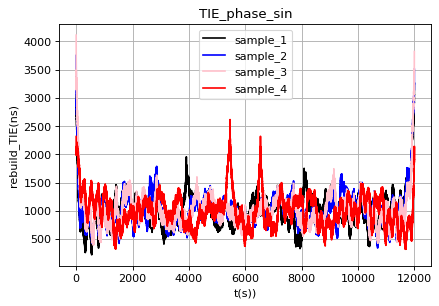

In [20]:
tie_output_cluster = tie_noise_gen(
    tie_input=tie, sample_rate=sample_rate, gen_num=4, style='sin', fft_style='noise.numpy_psd')
tie0 = tie_output_cluster[0]
tie1 = tie_output_cluster[1]
tie2 = tie_output_cluster[2]
tie3 = tie_output_cluster[3]
tt = np.linspace(0, 12000, len(tie0))
plt.plot(tt, tie0, color='black')
plt.plot(tt, tie1, color='blue')
plt.plot(tt, tie2, color='pink')
plt.plot(tt, tie3, color='red')
# plt.plot(tie0[:12000*50-1], label='S_ifft1', color='orangered',
#         linewidth=1, marker='*', markersize=5)
# plt.plot(tie1[:12000*50-1], label='S_ifft2',
#         color='blue', linestyle='-.', linewidth=0.2, marker='o', markersize=5)
# plt.plot(tie2[:12000*50-1], label='S_ifft3',
#         color='blue', linestyle='-', linewidth=0.2, marker='+', markersize=5)
# plt.plot(tie3[:12000*50-1], label='S_ifft4',
#         color='pink', linestyle=':', linewidth=0.2, marker='v', markersize=5)
plt.xlabel("t(s))")
plt.ylabel("rebuild_TIE(ns)")
plt.title("TIE_phase_sin")
plt.grid()
plt.legend(['sample_1', 'sample_2', 'sample_3', 'sample_4'])
plt.show()

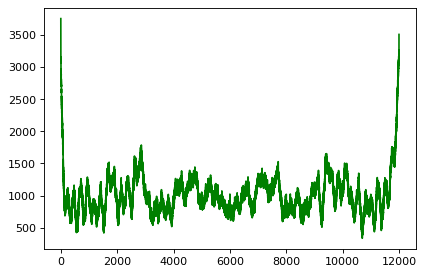

In [21]:
plt.plot(tt, tie1, color='green')

## rsults of TDEV

/usr/local/lib/python3.6/dist-packages/allantools/allantools.py:233: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(s)


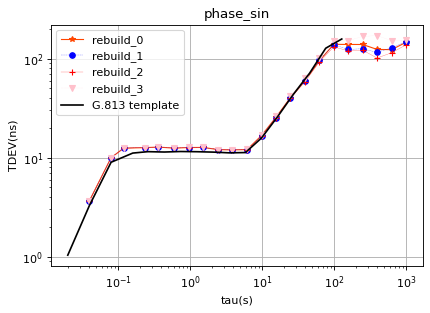

In [22]:
fft_style = 'noise.numpy_psd'
if fft_style == 'scipy.pack':
    sample_rate1 = sample_rate * 1.0
else:
    sample_rate1 = sample_rate * 0.5
min_tau1 = np.log(1/sample_rate1)
N_tdev = 32
tau1 = np.logspace(min_tau1, 3, N_tdev)  # min_tau->1000
(t1, ad1, ade, adn) = allantools.tdev(tie0, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad2, ade, adn) = allantools.tdev(tie1, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad3, ade, adn) = allantools.tdev(tie2, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad4, ade, adn) = allantools.tdev(tie3, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
min_tau = np.log(1/sample_rate)
#N_tdev = 16
tau = np.logspace(min_tau, 3, N_tdev)  # min_tau->1000
(t0, ad0, ade, adn) = allantools.tdev(tie, rate=sample_rate,
                                      data_type="phase", taus=tau)  # Compute TDEV metrics

plt.loglog(t1, ad1, color='orangered',
           linewidth=1, marker='*', markersize=5)  # Plot the results
plt.loglog(t1, ad2, color='blue', linestyle='-.', linewidth=0.2,
           marker='o', markersize=5)  # Plot the results
plt.loglog(t1, ad3, color='red', linestyle='-', linewidth=0.2,
           marker='+', markersize=5)  # Plot the results
plt.loglog(t1, ad4, color='pink', linestyle=':', linewidth=0.2,
           marker='v', markersize=5)  # Plot the results
plt.loglog(t0, ad0, color='black')  # Plot the results

plt.xlabel('tau(s)')
plt.ylabel('TDEV(ns)')
plt.grid()
plt.title('phase_sin')
plt.legend(['rebuild_0', 'rebuild_1', 'rebuild_2', 'rebuild_3', 'G.813 template'])
# plt.legend(['rebuild_1','rebuild_2','rebuild_3','rebuild_4'])
plt.show()

## results of MTIE

taus N= 18   [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
devs N= 18   [ 271.24028319  379.9454284   460.23340427  557.39720642  581.53838382
  632.36817547  718.02453691  831.18910334 1021.79863393 1461.26086229
 2209.36120623 2868.83529229 3235.17878276 3274.53439115 3274.53439115
 3274.53439115 3274.53439115 3274.53439115]
taus N= 18   [     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   8192  16384  32768  65536 131072]
taus N= 18   [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
devs N= 18   [ 284.56541489  395.94569378  473.82557241  583.35253147  614.227118
  658.94160761  765.28013243  887.32846976 1107.61848131 1522.72103953
 2219.37463214 3063.1349532  3178.14432982 3322.65379101 3322.65379101
 3329.83527638 3329.83527638 3329.83527638]
taus N= 18   [     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   

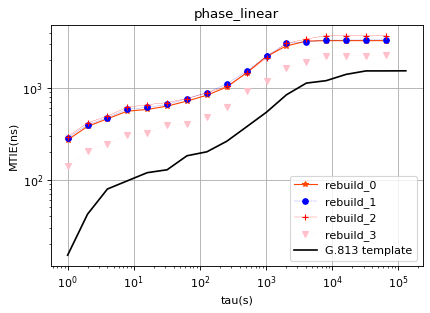

In [23]:
fft_style = 'noise.numpy_psd'
if fft_style == 'scipy.pack':
    sample_rate1 = sample_rate * 1.0
else:
    sample_rate1 = sample_rate * 0.5
min_tau1 = np.log(1/sample_rate1)
N_mtie = 8
tau1 = np.logspace(min_tau1, 4, N_mtie)  # min_tau->10000
(t1, ad1, ade, adn) = allantools.mtie_phase_fast(tie0, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad2, ade, adn) = allantools.mtie_phase_fast(tie1, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad3, ade, adn) = allantools.mtie_phase_fast(tie2, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
(t1, ad4, ade, adn) = allantools.mtie_phase_fast(tie3, rate=sample_rate1,
                                      data_type="phase", taus=tau1)  # Compute TDEV metrics
min_tau = np.log(1/sample_rate)
#N_tdev = 16
tau = np.logspace(min_tau, 4, N_mtie)  # min_tau->10000
(t0, ad0, ade, adn) = allantools.mtie_phase_fast(tie, rate=sample_rate,
                                      data_type="phase", taus=tau)  # Compute TDEV metrics

plt.loglog(t1, ad1, color='orangered',
           linewidth=1, marker='*', markersize=5)  # Plot the results
plt.loglog(t1, ad2, color='blue', linestyle='-.', linewidth=0.2,
           marker='o', markersize=5)  # Plot the results
plt.loglog(t1, ad3, color='red', linestyle='-', linewidth=0.2,
           marker='+', markersize=5)  # Plot the results
plt.loglog(t1, ad4, color='pink', linestyle=':', linewidth=0.2,
           marker='v', markersize=5)  # Plot the results
plt.loglog(t0, ad0, color='black')  # Plot the results

plt.xlabel('tau(s)')
plt.ylabel('MTIE(ns)')
plt.grid()
plt.title('phase_linear')
plt.legend(['rebuild_0', 'rebuild_1', 'rebuild_2', 'rebuild_3', 'G.813 template'])
# plt.legend(['rebuild_1','rebuild_2','rebuild_3','rebuild_4'])
plt.show()

# show more

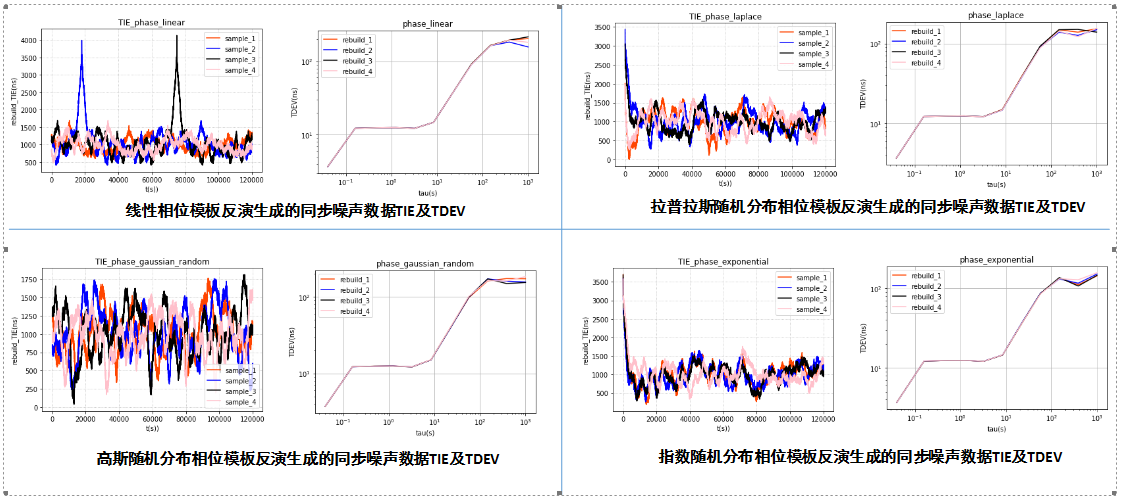
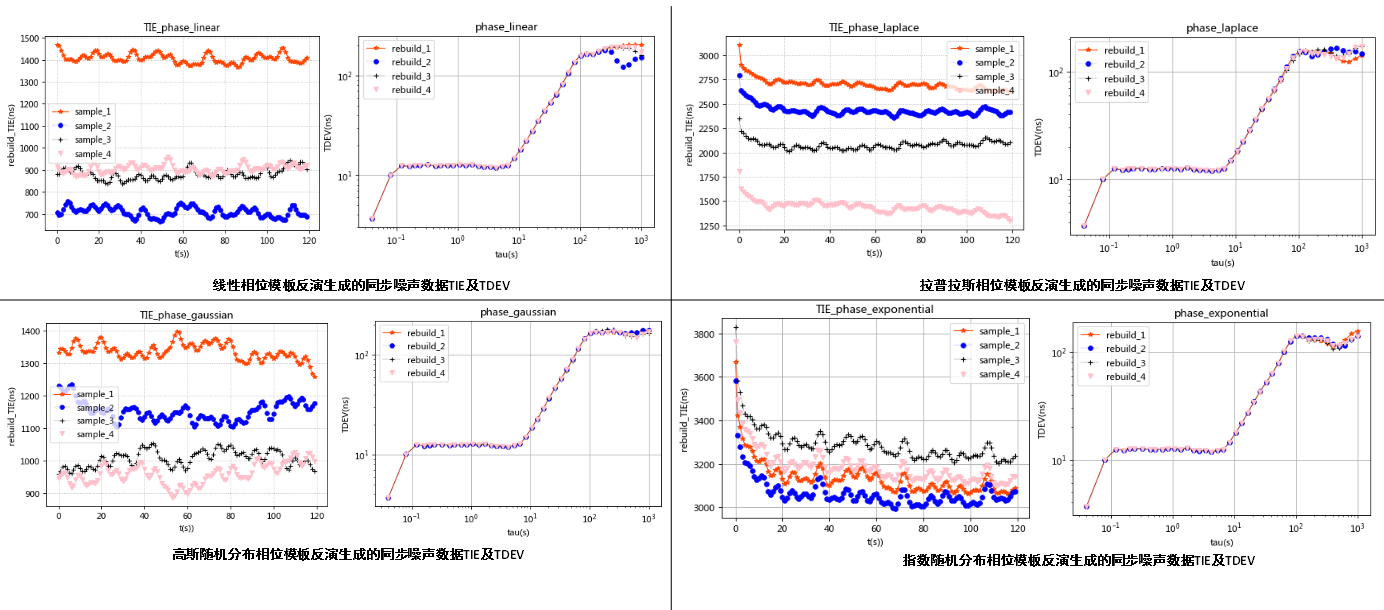

# applications

## we design only once!

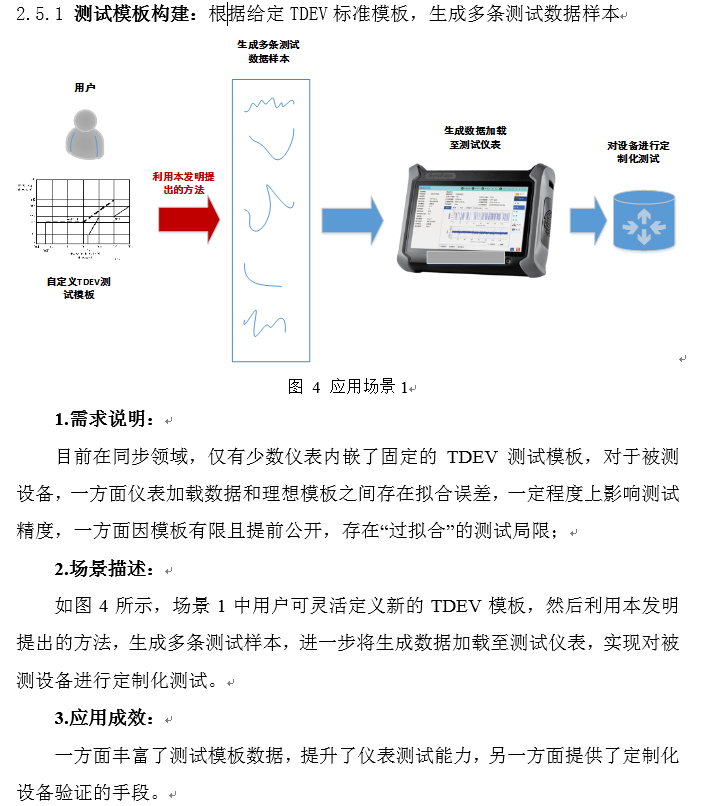

## we collect only once!

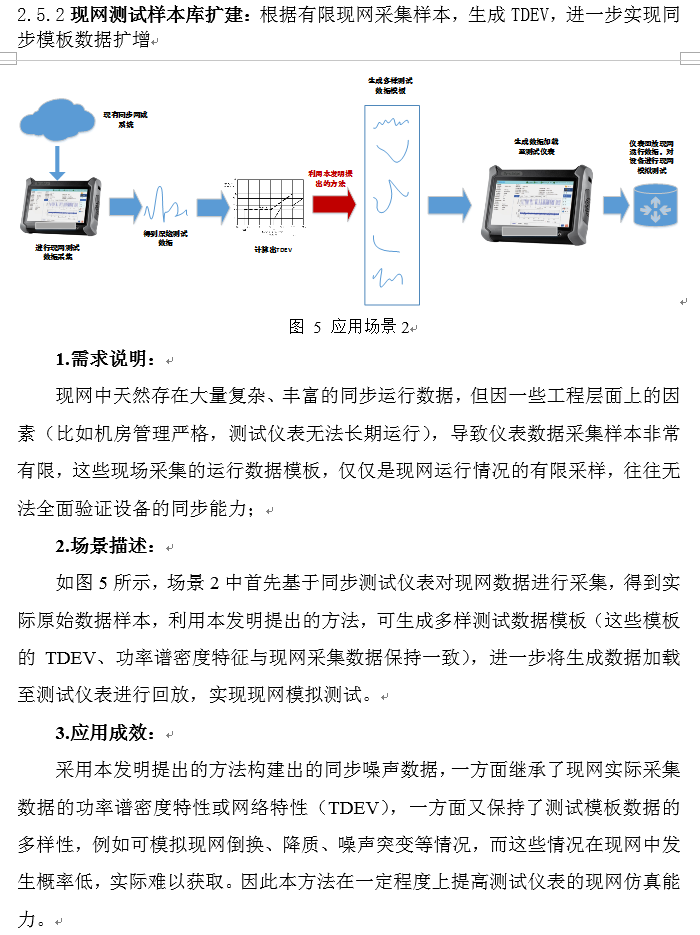

# Background materials

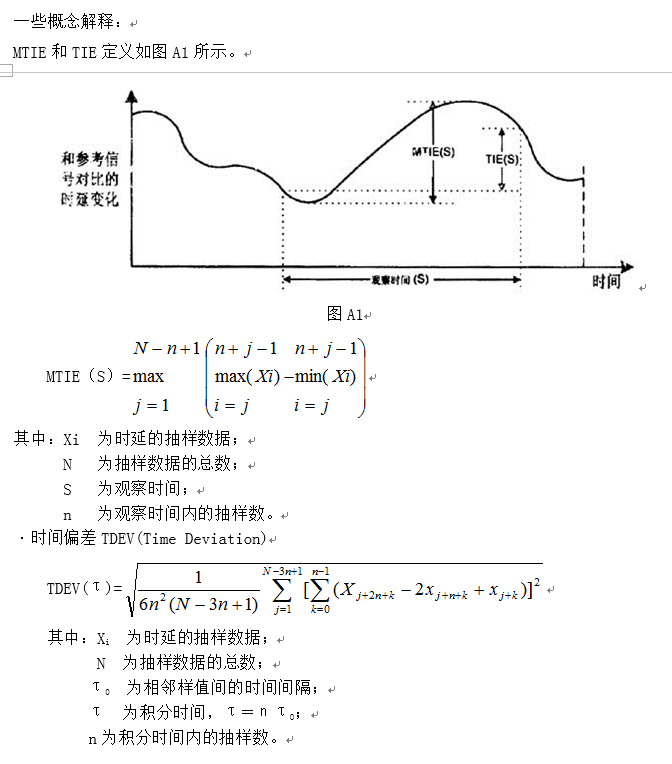